In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Carregando o Dataset
dados = pd.read_excel('rio_negro.xlsx')

In [2]:
# Converter a coluna 'Data' para o formato datetime
dados['Data'] = pd.to_datetime(dados['Data'])

# Definir a coluna 'Data' como índice
dados = dados.set_index('Data')

In [3]:
dados.head()

,Cota(m),Encheu/ Vazou (cm)
Data,,
2023-01-01,19.24,3.0
2023-01-02,19.27,3.0
2023-01-03,19.34,7.0
2023-01-04,19.38,4.0
2023-01-05,19.44,6.0


In [4]:
# Removendo linhas ou colunas que contenham valores ausentes
dados.dropna(inplace=True)

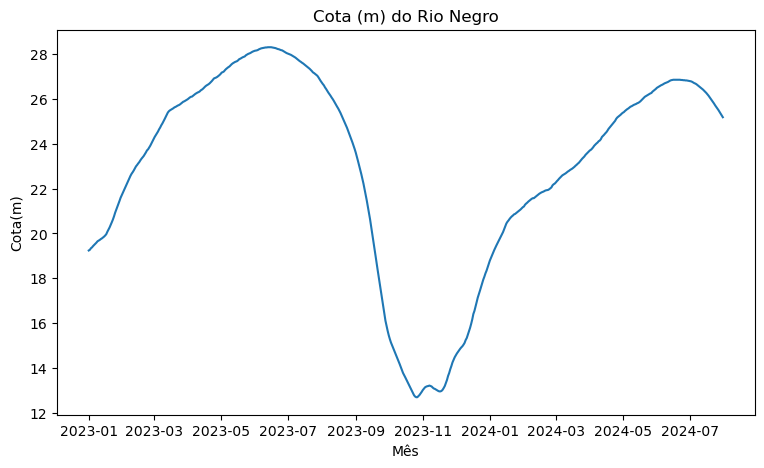

In [5]:
# Visualizar a série temporal
plt.figure(figsize=(9, 5))
plt.plot(dados.index, dados['Cota(m)'])
plt.xlabel('Mês')
plt.ylabel('Cota(m)')
plt.title('Cota (m) do Rio Negro')
plt.show()

In [6]:
# Teste de Augmented Dickey-Fuller (ADF)
resultado = adfuller(dados['Cota(m)'])
print(f"Estatística ADF: {resultado[0]}")
print(f"p-Valor: {resultado[1]}")

print('Valores Criticos:')
for chave, valor in resultado[4].items():
    print(f"{chave}: {valor}")

Estatística ADF: -3.3254401471968937
p-Valor: 0.013778897285664839
Valores Criticos:
1%: -3.441956369604407
5%: -2.8666599744723045
10%: -2.5694967895716014


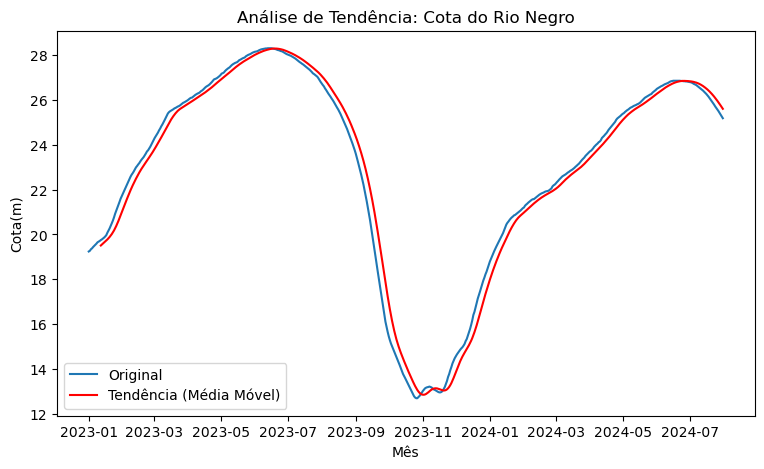

In [7]:
# Calcule a média móvel (média móvel simples) com uma janela de 12 meses
rolling_mean = dados['Cota(m)'].rolling(window=12).mean()

# Visualize a série temporal original e o componente de tendência
plt.figure(figsize=(9, 5))
plt.plot(dados.index, dados['Cota(m)'], label='Original')
plt.plot(dados.index, rolling_mean, color='red', label='Tendência (Média Móvel)')
plt.xlabel('Mês')
plt.ylabel('Cota(m)')
plt.title('Análise de Tendência: Cota do Rio Negro')
plt.legend()
plt.show()

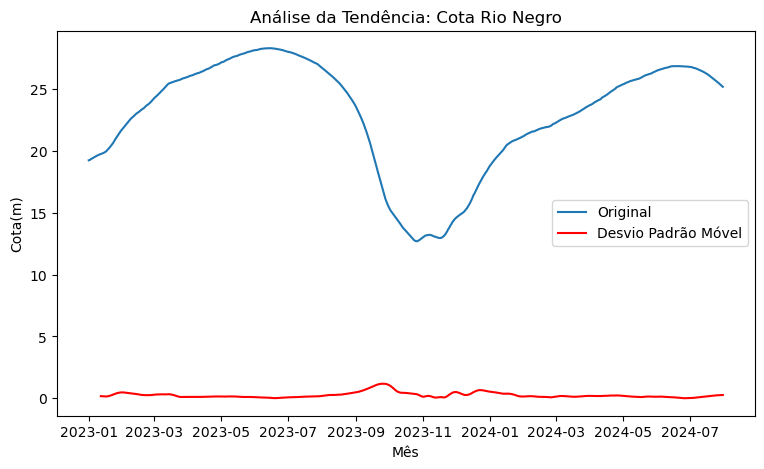

In [8]:
# Calcule o desvio padrão móvel com uma janela de 12 períodos
rolstd = dados['Cota(m)'].rolling(window=12).std()

# Visualize a série temporal original e o desvio padrão móvel
plt.figure(figsize=(9, 5))
plt.plot(dados.index, dados['Cota(m)'], label='Original')
plt.plot(dados.index, rolstd, color='red', label='Desvio Padrão Móvel')
plt.xlabel('Mês') 
plt.ylabel('Cota(m)')
plt.title('Análise da Tendência: Cota Rio Negro')
plt.legend()
plt.show()

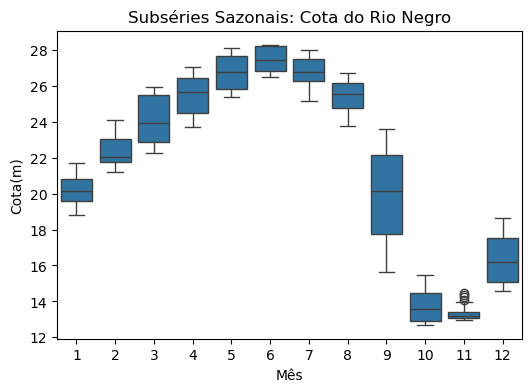

In [9]:
import seaborn as sns

# Crie uma nova coluna para o mês
dados['Mes'] = dados.index.month

# Calcule o valor médio para cada mês
monthly_avg = dados.groupby('Mes')['Cota(m)'].mean()

# Criando subséries sazonais 
plt.figure(figsize=(6, 4))
sns.boxplot(x=dados['Mes'], y=dados['Cota(m)'])
plt.xlabel('Mês')
plt.ylabel('Cota(m)')
plt.title('Subséries Sazonais: Cota do Rio Negro')
plt.show()

<Figure size 600x400 with 0 Axes>

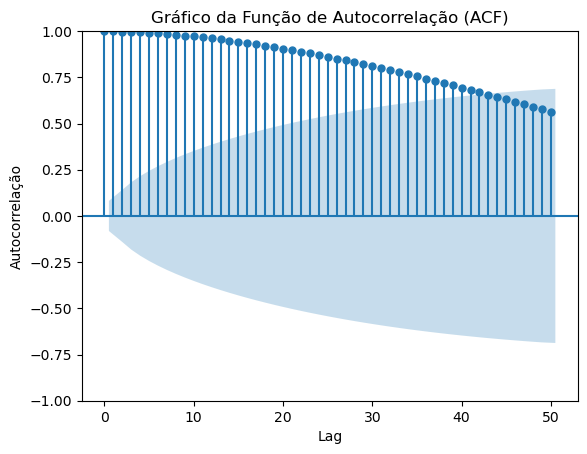

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

# Gerando o gráfico de ACF
plt.figure(figsize=(6, 4))
plot_acf(dados['Cota(m)'], lags=50)
plt.xlabel('Lag')
plt.ylabel('Autocorrelação')
plt.title('Gráfico da Função de Autocorrelação (ACF)')
plt.show()

<Figure size 600x400 with 0 Axes>

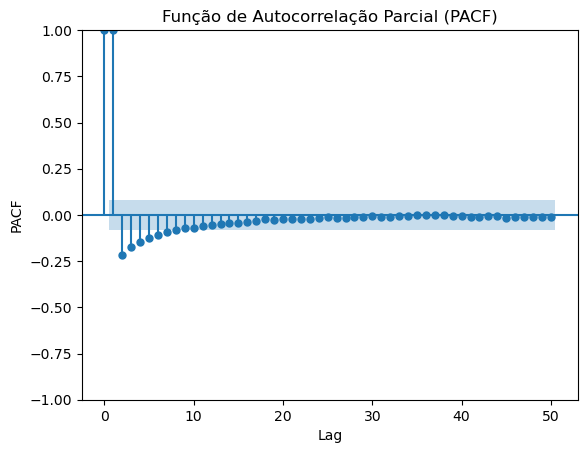

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf

# Calculando o PACF 
plt.figure(figsize=(6, 4))
plot_pacf(dados['Cota(m)'], lags =50)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Função de Autocorrelação Parcial (PACF)')
plt.show()

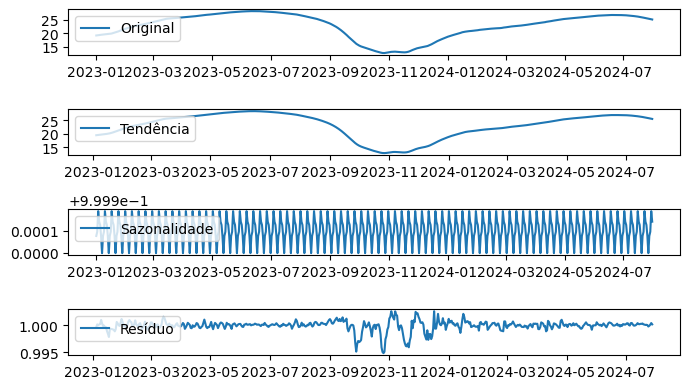

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decomposição 
decomposition = seasonal_decompose(dados['Cota(m)'], model='multiplicative')
plt.figure(figsize=(7, 4))
plt.subplot(411)
plt.plot(dados['Cota(m)'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Tendência')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Sazonalidade')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Resíduo')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

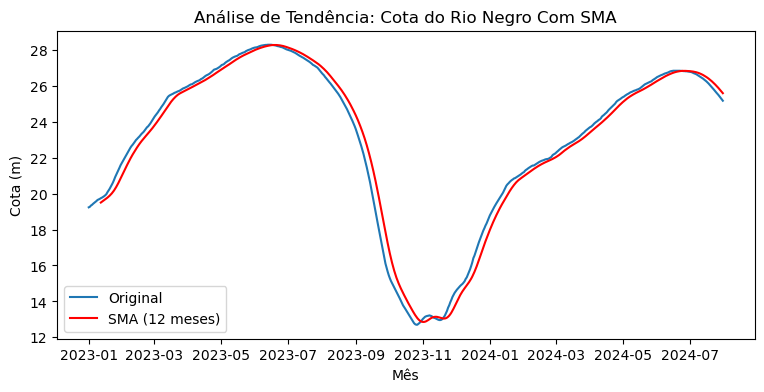

In [13]:
# Calcule a Média Móvel Simples (SMA) com uma janela de 12 meses
sma = dados['Cota(m)'].rolling(window=12).mean()

# Visualize a série original e a SMA
plt.figure(figsize=(9, 4))
plt.plot(dados.index, dados['Cota(m)'], label='Original')
plt.plot(dados.index, sma, color='red', label='SMA (12 meses)')
plt.xlabel('Mês')
plt.ylabel('Cota (m)')
plt.title('Análise de Tendência: Cota do Rio Negro Com SMA')
plt.legend()
plt.show()

C:\Users\Elzilane Barreto\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Elzilane Barreto\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Elzilane Barreto\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


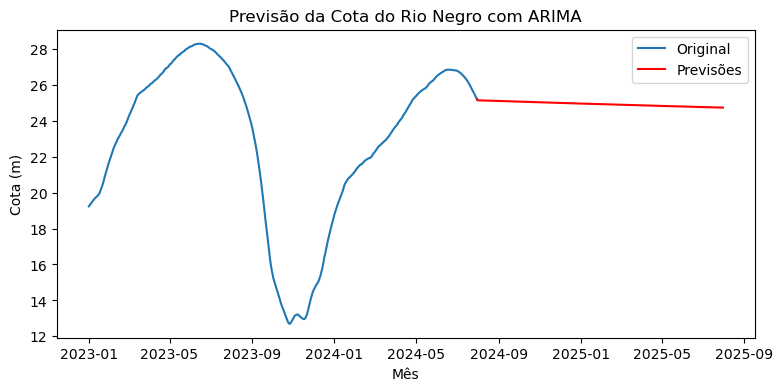

In [14]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(dados['Cota(m)'], order=(1, 0, 1))
fitted_model = model.fit()
predictions = fitted_model.predict(start=dados.index[-1], end=dados.index[-1] + pd.DateOffset(months=12))

plt.figure(figsize=(9, 4))
plt.plot(dados['Cota(m)'], label='Original')
plt.plot(predictions, color='red', label='Previsões')
plt.xlabel('Mês')
plt.ylabel('Cota (m)')
plt.title('Previsão da Cota do Rio Negro com ARIMA')
plt.legend()
plt.show()

C:\Users\Elzilane Barreto\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Elzilane Barreto\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Elzilane Barreto\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Elzilane Barreto\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Elzilane Barreto\anaconda3\Lib\site-packages\s

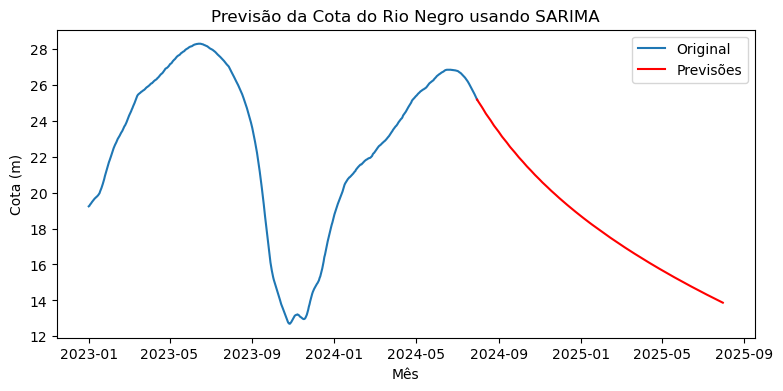

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(dados['Cota(m)'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
fitted_model = model.fit()
predictions = fitted_model.predict(start=dados.index[-1], end=dados.index[-1] + pd.DateOffset(months=12))

plt.figure(figsize=(9, 4))
plt.plot(dados['Cota(m)'], label='Original')
plt.plot(predictions, color='red', label='Previsões')
plt.xlabel('Mês')
plt.ylabel('Cota (m)')
plt.title('Previsão da Cota do Rio Negro usando SARIMA')
plt.legend()
plt.show()